In [1]:
# Import das bibliotecas que serão utilizadas no projeto
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Importando o dataset do teste (submissão)
teste = pd.read_csv('docs/dataset_teste.csv', sep=',')

# Lendo o dataset para treinamento  
df_treino = pd.read_csv("docs/dataset_limpo.csv", sep = ",")

In [3]:
display(teste)
display(df_treino)

,ID_CLIENTE,SAFRA_REF,VALOR_A_PAGAR,TAXA,Mes_Emissao_Documento,Dia_Emissao_Documento,Mes_Vencimento,Dia_Vencimento
0,5058298901476893676,2021-07,11204.75,4.99,7,14,8,4
1,274692171162531764,2021-07,60718.50,5.99,7,8,8,23
2,274692171162531764,2021-07,60718.50,5.99,7,11,8,25
3,274692171162531764,2021-07,62250.00,5.99,7,16,8,30
4,465309249432033993,2021-07,26593.95,6.99,7,5,7,30
...,...,...,...,...,...,...,...,...
12270,705648002974742140,2021-11,47010.00,6.99,11,25,12,13
12271,4993499380140734678,2021-11,122875.35,8.99,11,25,12,13
12272,4614484019183480654,2021-11,302200.00,5.99,11,26,9,30
12273,1299146298565441811,2021-11,143791.85,5.99,11,26,12,13


,VALOR_A_PAGAR,TAXA,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS,PJ_ou_PF,SEGMENTO_INDUSTRIAL_Comércio,SEGMENTO_INDUSTRIAL_Indústria,SEGMENTO_INDUSTRIAL_Serviços,Tam_Empresa,INADIMPLENCIA,Mes_Emissao_Documento,Dia_Emissao_Documento,Mes_Vencimento,Dia_Vencimento
0,35516.41,6.99,217640.0,115.0,1,0,0,1,0,0,8,17,9,6
1,17758.21,6.99,217640.0,115.0,1,0,0,1,0,0,8,19,9,10
2,17431.96,6.99,217640.0,115.0,1,0,0,1,0,0,8,26,9,17
3,1341.00,6.99,217640.0,115.0,1,0,0,1,0,1,8,30,10,5
4,21309.85,6.99,217640.0,115.0,1,0,0,1,0,0,8,31,9,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77262,89980.00,5.99,280343.0,161.0,1,1,0,0,0,0,6,30,7,16
77263,42239.00,5.99,235315.0,87.0,1,0,1,0,2,0,6,30,8,16
77264,20921.50,5.99,100006.0,122.0,1,0,0,1,2,0,6,30,7,16
77265,90231.05,6.99,234489.0,115.0,1,0,0,1,1,0,6,30,7,16


Divisão entre treino e teste do dataset de TREINO

In [3]:
# Divisão entre treino e teste
from sklearn.model_selection import train_test_split

# Divisão entre target e o que será usado no modelo
X = df_treino.drop(['RENDA_MES_ANTERIOR', 'NO_FUNCIONARIOS', 'PJ_ou_PF', 'SEGMENTO_INDUSTRIAL_Comércio', 'SEGMENTO_INDUSTRIAL_Indústria', 'SEGMENTO_INDUSTRIAL_Serviços', 'Tam_Empresa',
                            'INADIMPLENCIA'], axis=1)
y = df_treino['INADIMPLENCIA']

# Divisão entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Modelos que irei usar
1. Regressão Logística
2. Random Forest
3. Árvore de Decisão
4. KNeighborsClassifier

In [4]:
# Import dos modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import classification_report, RocCurveDisplay, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [5]:
# Treino do Modelo LogisticRegression
logreg = LogisticRegression()
# Fit de treino
logreg = logreg.fit(X_train, y_train)
# Previsao
y_pred_logreg = logreg.predict(X_test)
# Acurácia
acuracia_logreg = accuracy_score(y_test, y_pred_logreg)
print(f'Acurácia da LogisticRegression: {acuracia_logreg}')

Acurácia da LogisticRegression: 0.9280445192183253


/home/rafael/Downloads/Projeto - Modelo Preditivo/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
# Treino do Modelo RandomForestClassifier
forest = RandomForestClassifier()
# Fit de treino
forest = forest.fit(X_train, y_train)
# Previsao
y_pred_forest = forest.predict(X_test)
# Acurácia
acuracia_forest = accuracy_score(y_test, y_pred_forest)
print(f'Acurácia da RandomForestClassifier: {acuracia_forest}')

Acurácia da RandomForestClassifier: 0.9397566972951986


In [7]:
# Treino do Modelo DecisionTreeClassifier
arvore = tree.DecisionTreeClassifier()
# Fit de treino
arvore = arvore.fit(X_train, y_train)
# Previsao
y_pred_arvore = arvore.predict(X_test)
# Acurácia
acuracia_arvore = accuracy_score(y_test, y_pred_arvore)
print(f'Acurácia da DecisionTreeClassifier: {acuracia_arvore}')

Acurácia da DecisionTreeClassifier: 0.9055907855571373


In [8]:
# Treino do Modelo KNeighborsClassifier
knn = KNeighborsClassifier()
# Fit de treino
knn = knn.fit(X_train, y_train)
# Previsao
y_pred_knn = knn.predict(X_test)
# Acurácia
acuracia_knn = accuracy_score(y_test, y_pred_knn)
print(f'Acurácia da KNeighborsClassifier: {acuracia_knn}')

Acurácia da KNeighborsClassifier: 0.929144558043225


# Avaliando os Modelos

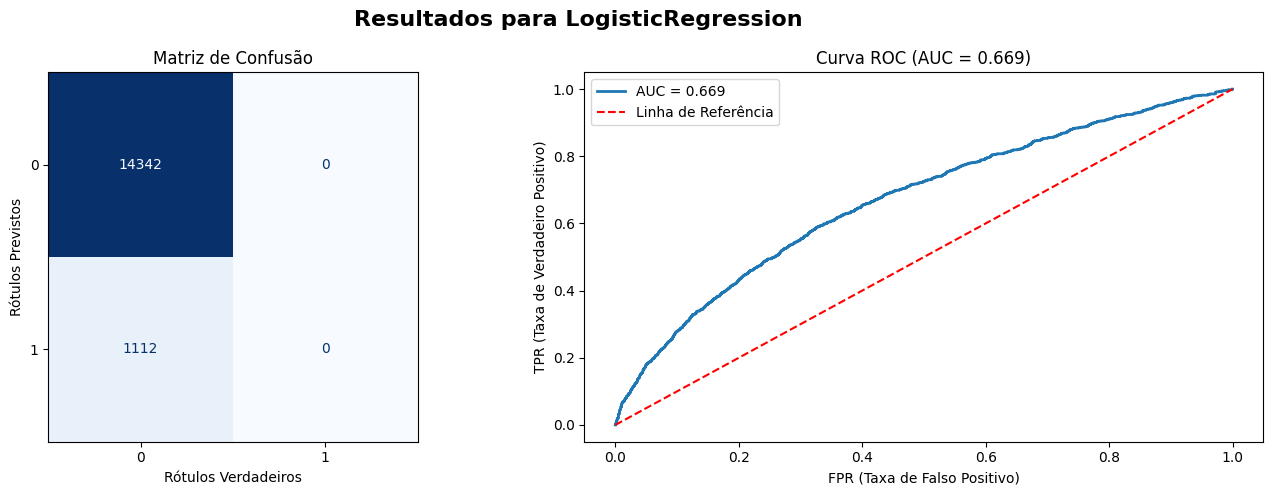

In [9]:
# Modelo LogisticRegression

# Matrix de Confusão LogisticRegression
conf_matrix_logreg = metrics.confusion_matrix(y_test, y_pred_logreg)

# Gráfico AUC LogisticRegression
y_pred_proba_logreg = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_logreg)
auc = metrics.roc_auc_score(y_test, y_pred_proba_logreg)

# --------- CRIANDO A FIGURA COM SUBPLOTS ----------
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Resultados para LogisticRegression', fontsize=16, fontweight='bold')

# --------- SUBPLOT 1: MATRIZ DE CONFUSÃO ----------
ConfusionMatrixDisplay(conf_matrix_logreg).plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title("Matriz de Confusão")
axes[0].set_xlabel('Rótulos Verdadeiros')
axes[0].set_ylabel('Rótulos Previstos')

# --------- SUBPLOT 2: CURVA ROC ----------
axes[1].plot(fpr, tpr, linewidth=2, label=f"AUC = {auc:.3f}")
axes[1].plot([0, 1], [0, 1], linestyle='--', color="red", label="Linha de Referência")  # linha do modelo aleatório
axes[1].set_title(f"Curva ROC (AUC = {auc:.3f})")
axes[1].set_xlabel("FPR (Taxa de Falso Positivo)")
axes[1].set_ylabel("TPR (Taxa de Verdadeiro Positivo)")
axes[1].legend()
plt.tight_layout()
plt.show()

In [10]:
logreg_report = classification_report(y_test, y_pred_logreg, output_dict=True)
df_logreg_report = pd.DataFrame(logreg_report).T
df_logreg_report.style.background_gradient(cmap='Blues').format('{:.2f}').set_caption('Reporte de Classificação do RandomForestClassifier')

/home/rafael/Downloads/Projeto - Modelo Preditivo/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/rafael/Downloads/Projeto - Modelo Preditivo/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/rafael/Downloads/Projeto - Modelo Preditivo/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to co

,precision,recall,f1-score,support
0,0.93,1.00,0.96,14342.00
1,0.00,0.00,0.00,1112.00
accuracy,0.93,0.93,0.93,0.93
macro avg,0.46,0.50,0.48,15454.00
weighted avg,0.86,0.93,0.89,15454.00


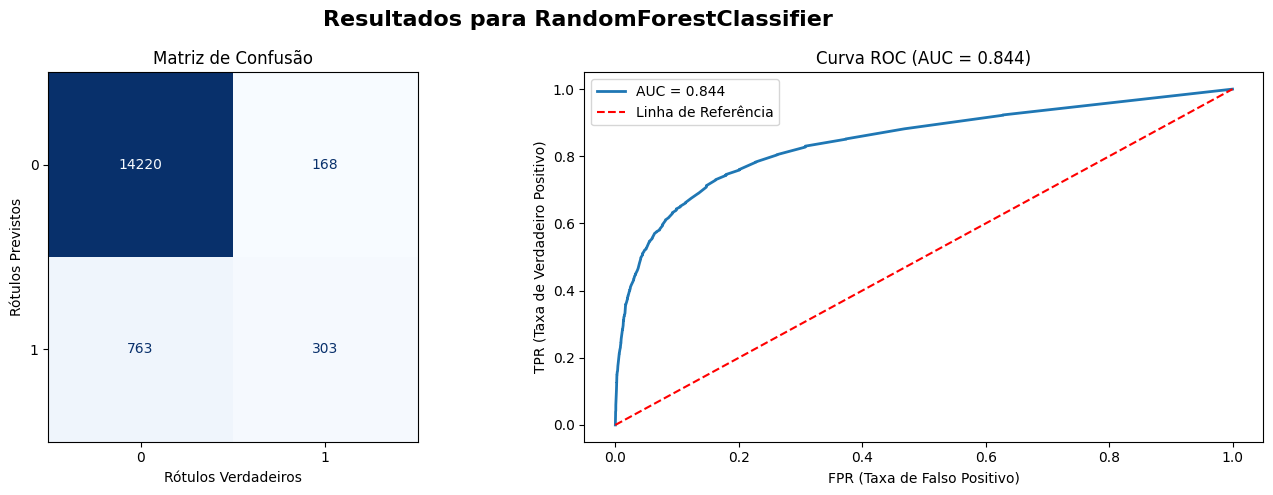

In [9]:
# Modelo RandomForestClassifier

# Matrix de Confusão RandomForestClassifier
conf_matrix_forest = metrics.confusion_matrix(y_test, y_pred_forest)

# Gráfico AUC RandomForestClassifier
y_pred_proba_forest = forest.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_forest)
auc = metrics.roc_auc_score(y_test, y_pred_proba_forest)

# --------- CRIANDO A FIGURA COM SUBPLOTS ----------
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Resultados para RandomForestClassifier', fontsize=16, fontweight='bold')

# --------- SUBPLOT 1: MATRIZ DE CONFUSÃO ----------
ConfusionMatrixDisplay(conf_matrix_forest).plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title("Matriz de Confusão")
axes[0].set_xlabel('Rótulos Verdadeiros')
axes[0].set_ylabel('Rótulos Previstos')

# --------- SUBPLOT 2: CURVA ROC ----------
axes[1].plot(fpr, tpr, linewidth=2, label=f"AUC = {auc:.3f}")
axes[1].plot([0, 1], [0, 1], linestyle='--', color="red", label="Linha de Referência")  # linha do modelo aleatório
axes[1].set_title(f"Curva ROC (AUC = {auc:.3f})")
axes[1].set_xlabel("FPR (Taxa de Falso Positivo)")
axes[1].set_ylabel("TPR (Taxa de Verdadeiro Positivo)")
axes[1].legend()
plt.tight_layout()
plt.show()

In [11]:
forest_report = classification_report(y_test, y_pred_forest, output_dict=True)
df_forest_report = pd.DataFrame(forest_report).T
df_forest_report.style.background_gradient(cmap='Blues').format('{:.2f}').set_caption('Reporte de Classificação do RandomForestClassifier')

,precision,recall,f1-score,support
0,0.95,0.99,0.97,14388.00
1,0.64,0.28,0.39,1066.00
accuracy,0.94,0.94,0.94,0.94
macro avg,0.80,0.64,0.68,15454.00
weighted avg,0.93,0.94,0.93,15454.00


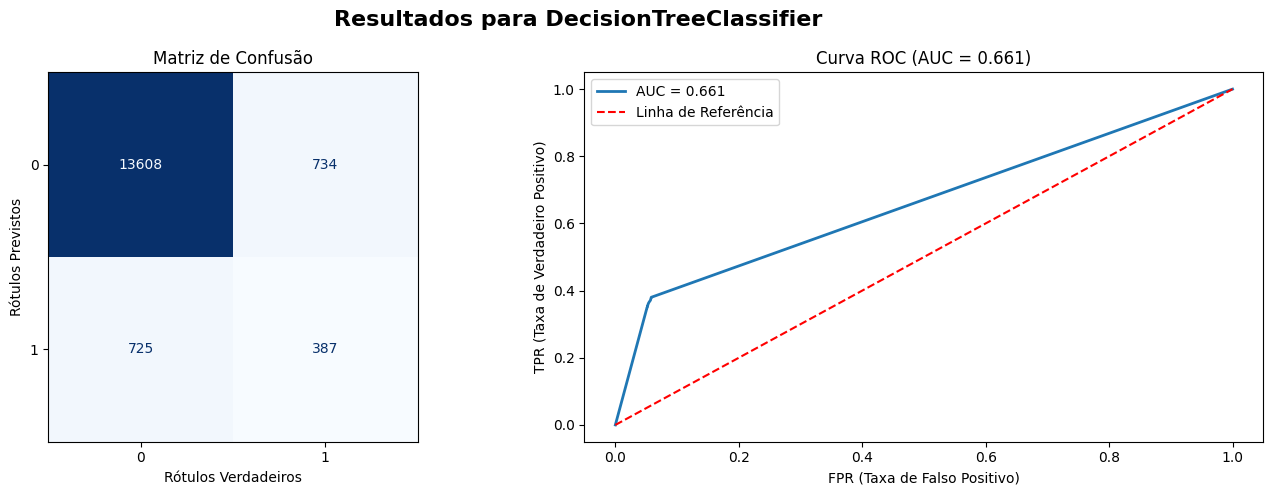

In [13]:
# Modelo DecisionTreeClassifier

# Matrix de Confusão DecisionTreeClassifier
conf_matrix_arvore = metrics.confusion_matrix(y_test, y_pred_arvore)

# Gráfico AUC DecisionTreeClassifier
y_pred_proba_arvore = arvore.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_arvore)
auc = metrics.roc_auc_score(y_test, y_pred_proba_arvore)

# --------- CRIANDO A FIGURA COM SUBPLOTS ----------
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Resultados para DecisionTreeClassifier', fontsize=16, fontweight='bold')

# --------- SUBPLOT 1: MATRIZ DE CONFUSÃO ----------
ConfusionMatrixDisplay(conf_matrix_arvore).plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title("Matriz de Confusão")
axes[0].set_xlabel('Rótulos Verdadeiros')
axes[0].set_ylabel('Rótulos Previstos')

# --------- SUBPLOT 2: CURVA ROC ----------
axes[1].plot(fpr, tpr, linewidth=2, label=f"AUC = {auc:.3f}")
axes[1].plot([0, 1], [0, 1], linestyle='--', color="red", label="Linha de Referência")  # linha do modelo aleatório
axes[1].set_title(f"Curva ROC (AUC = {auc:.3f})")
axes[1].set_xlabel("FPR (Taxa de Falso Positivo)")
axes[1].set_ylabel("TPR (Taxa de Verdadeiro Positivo)")
axes[1].legend()
plt.tight_layout()
plt.show()

In [14]:
arvore_report = classification_report(y_test, y_pred_arvore, output_dict=True)
df_arvore_report = pd.DataFrame(arvore_report).T
df_arvore_report.style.background_gradient(cmap='Blues').format('{:.2f}').set_caption('Reporte de Classificação do DecisionTreeClassifier')

,precision,recall,f1-score,support
0,0.95,0.95,0.95,14342.00
1,0.35,0.35,0.35,1112.00
accuracy,0.91,0.91,0.91,0.91
macro avg,0.65,0.65,0.65,15454.00
weighted avg,0.91,0.91,0.91,15454.00


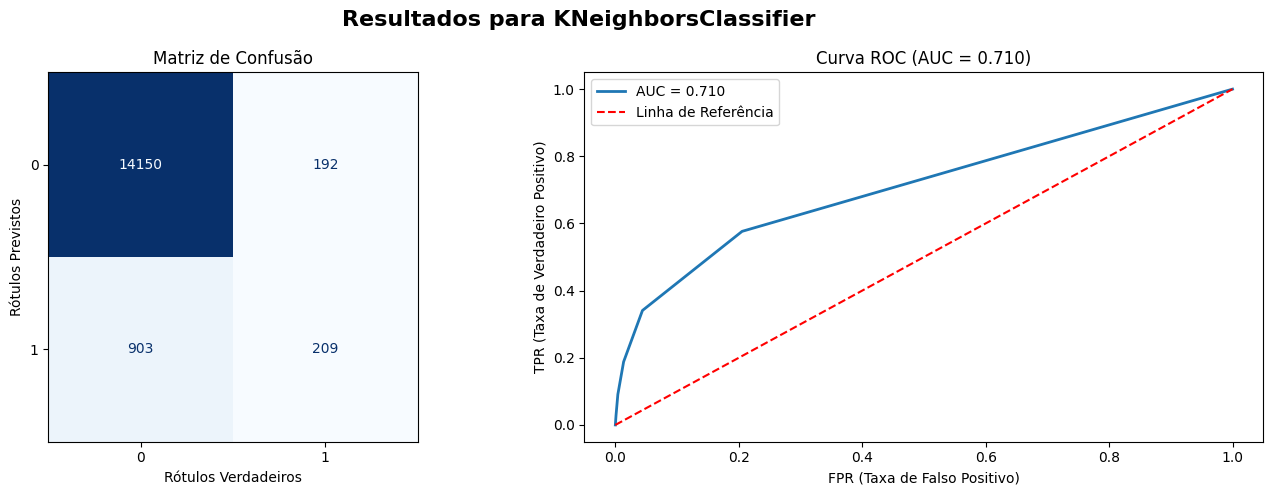

In [15]:
# Modelo KNeighborsClassifier

# Matrix de Confusão KNeighborsClassifier
conf_matrix_knn = metrics.confusion_matrix(y_test, y_pred_knn)

# Gráfico AUC KNeighborsClassifier
y_pred_proba_knn = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_knn)
auc = metrics.roc_auc_score(y_test, y_pred_proba_knn)

# --------- CRIANDO A FIGURA COM SUBPLOTS ----------
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Resultados para KNeighborsClassifier', fontsize=16, fontweight='bold')

# --------- SUBPLOT 1: MATRIZ DE CONFUSÃO ----------
ConfusionMatrixDisplay(conf_matrix_knn).plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title("Matriz de Confusão")
axes[0].set_xlabel('Rótulos Verdadeiros')
axes[0].set_ylabel('Rótulos Previstos')

# --------- SUBPLOT 2: CURVA ROC ----------
axes[1].plot(fpr, tpr, linewidth=2, label=f"AUC = {auc:.3f}")
axes[1].plot([0, 1], [0, 1], linestyle='--', color="red", label="Linha de Referência")  # linha do modelo aleatório
axes[1].set_title(f"Curva ROC (AUC = {auc:.3f})")
axes[1].set_xlabel("FPR (Taxa de Falso Positivo)")
axes[1].set_ylabel("TPR (Taxa de Verdadeiro Positivo)")
axes[1].legend()
plt.tight_layout()
plt.show()

In [16]:
knn_report = classification_report(y_test, y_pred_knn, output_dict=True)
df_knn_report = pd.DataFrame(knn_report).T
df_knn_report.style.background_gradient(cmap='Blues').format('{:.2f}').set_caption('Reporte de Classificação do DecisionTreeClassifier')

,precision,recall,f1-score,support
0,0.94,0.99,0.96,14342.00
1,0.52,0.19,0.28,1112.00
accuracy,0.93,0.93,0.93,0.93
macro avg,0.73,0.59,0.62,15454.00
weighted avg,0.91,0.93,0.91,15454.00


# Avaliando na Base de Teste
Agora irei avaliar os modelos na `base_pagamentos_teste.csv`

In [20]:
X_teste = teste.drop(['ID_CLIENTE', 'SAFRA_REF'], axis=1)

In [21]:
# Utilizando o RandomForestClassifier na base de teste
y_pred = forest.predict(X_teste)

In [37]:
# Calculando a probabilidade de cada evento
y_broba = forest.predict_proba(X_teste)[:,1]*100

In [38]:
# Criando um nova coluna com a previsão na base de teste
teste['Inadimplencia'] = y_pred
teste['Probalidade %'] = y_broba

In [39]:
sub = teste[['ID_CLIENTE', 'SAFRA_REF', 'Inadimplencia', 'Probalidade %']]

In [47]:
display(sub)

,ID_CLIENTE,SAFRA_REF,Inadimplencia,Probalidade %
0,5058298901476893676,2021-07,0,8.0
1,274692171162531764,2021-07,0,1.0
2,274692171162531764,2021-07,0,25.0
3,274692171162531764,2021-07,0,7.0
4,465309249432033993,2021-07,0,0.0
...,...,...,...,...
12270,705648002974742140,2021-11,0,1.0
12271,4993499380140734678,2021-11,0,0.0
12272,4614484019183480654,2021-11,0,14.0
12273,1299146298565441811,2021-11,0,0.0


In [41]:
sub.Inadimplencia.value_counts(normalize=True)*100

Inadimplencia
0    98.729124
1     1.270876
Name: proportion, dtype: float64

In [42]:
df_filtrado_exato = sub[sub['Inadimplencia'] == 1]
print(df_filtrado_exato)

                ID_CLIENTE SAFRA_REF  Inadimplencia  Probalidade %
256    8229446069655666941   2021-07              1      66.666667
443    5714540197488862003   2021-07              1      59.919048
469    8536031856585966123   2021-07              1      61.000000
470    8536031856585966123   2021-07              1      65.000000
597    5477523784812182605   2021-07              1      51.000000
...                    ...       ...            ...            ...
11648  1239032704486561936   2021-11              1      61.000000
11649  1239032704486561936   2021-11              1      61.000000
11728   993334998462320108   2021-11              1      58.166667
11729   957773253650890560   2021-11              1      73.000000
11733  6094038865287329652   2021-11              1      78.000000

[156 rows x 4 columns]
